# Image Transformations

For this project, we are using the [COVID-19 CT segmentation dataset][dataset]. This notebook will explain the transformation applied to the images to make it easier to work with them. Feel free to question any conclusions raised here, as they can be wrong.

The following is slice 122 of the CT **coronacases_001.nii.gz** loaded with [ImageJ][imagej]:

![Slice 122 of the CT **coronacases_001.nii.gz**](images/ct_original_imagej.png "Slice 122 of the CT **coronacases_001.nii.gz**")

As you can see, it is rotated 180º: the curve shape at the top is the bed. It is not mirrored, as the heart (between the two lungs) is slightly to the left of the body after rotating it back.

My hypothesis is that data stored in the NIfTI file has its origin in the lower left corner, but the image subsystem in ImageJ has its origin in the upper left corner.

[dataset]: https://medicalsegmentation.com/covid19/ "COVID-19 CT segmentation dataset"
[imagej]: https://imagej.net/ij/index.html "Public domain software for processing and analyzing scientific images"

Let’s see how CT slices are displayed when loading them from Python. We are going to load the same slice from the CT. This slice and its corresponding masks have been obtained with the notebook **get_slice**. We are going to need the following libraries:

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

These variables store slice number we are interested in, and the path of the slices (image and masks) we are going to work with:

In [4]:
slice_number = 122
data_folder_path = Path('data')
image_slice_path = data_folder_path / Path(f'coronacases_001_image_slice_{slice_number}.npy')
masks_slice_path = data_folder_path/ Path(f'coronacases_001_masks_slice_{slice_number}.npy')

## CT Slice Transformations

First, we load the slice:

In [5]:
image_slice = np.load(image_slice_path)
image_slice.shape

(512, 512)

Then, we show it:

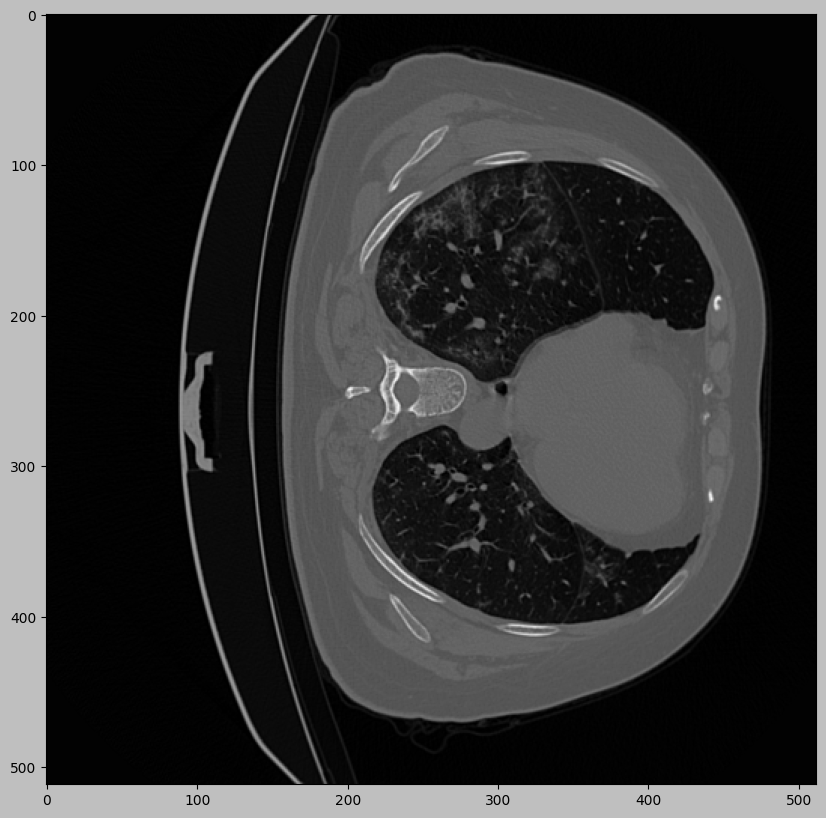

In [7]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice)
# plt.imshow(np.rot90(image_slice, k=3), origin='lower')
plt.show()

At first glance, you could be tempted to think the slice is rotated, but look at the bump between the lungs and compare it with the previous image: it is mirrored.

This is the result of the way Pyplot displays images, with its origin in the top left corner. Let's tell Pyplot to place origin in the lower left corner:

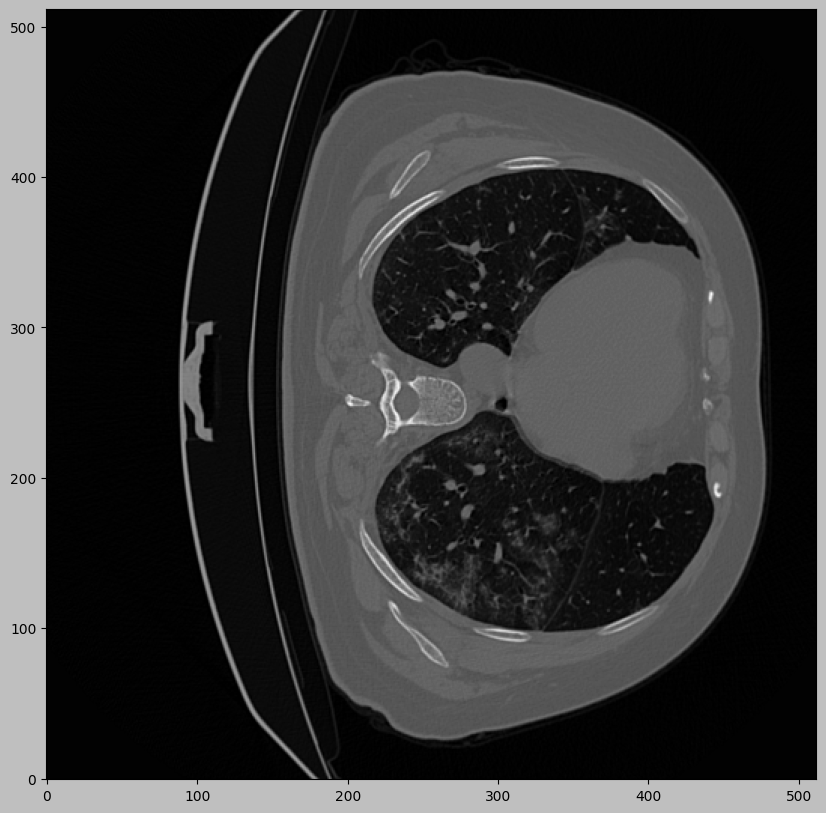

In [9]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(image_slice, origin='lower')
plt.show()

This is an improvement, now the image is just rotated. Let's fix that:

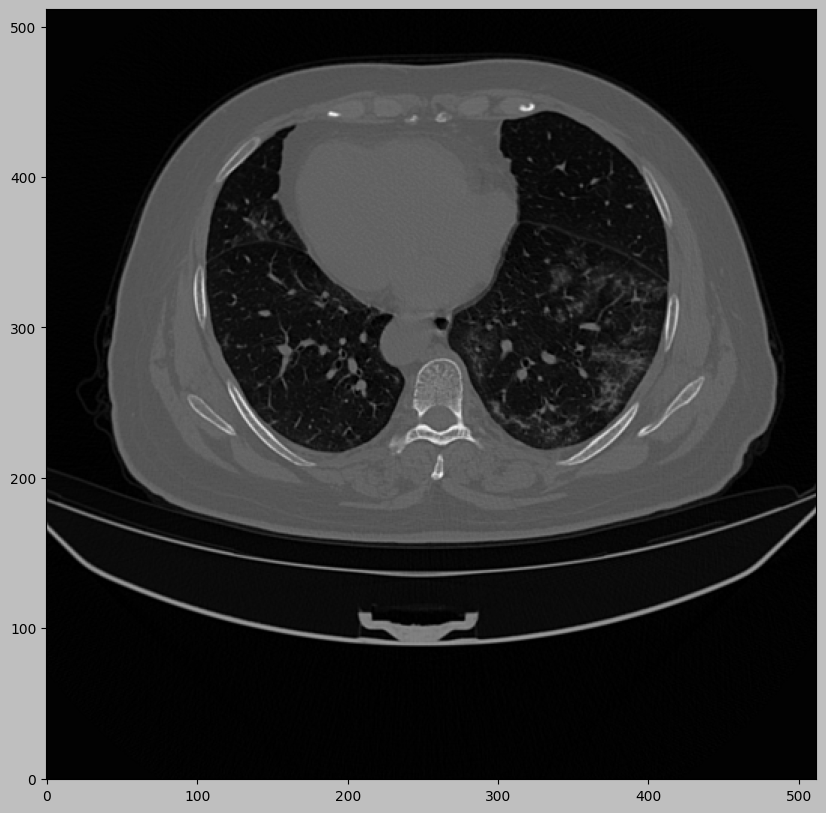

In [12]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(image_slice, k=3), origin='lower')
plt.show()

Now the CT looks right. to summarize, in this case:

1. We have to use a lower left origin of coordinates with Pyplot.
2. We have to rotate each image 270º before showing it.

## Masks Transformations

Let's follow the same steps with the corresponding masks, starting with the load of the file:

In [13]:
masks_slice = np.load(masks_slice_path)
masks_slice.shape

(512, 512)

Let's take a look at these masks:

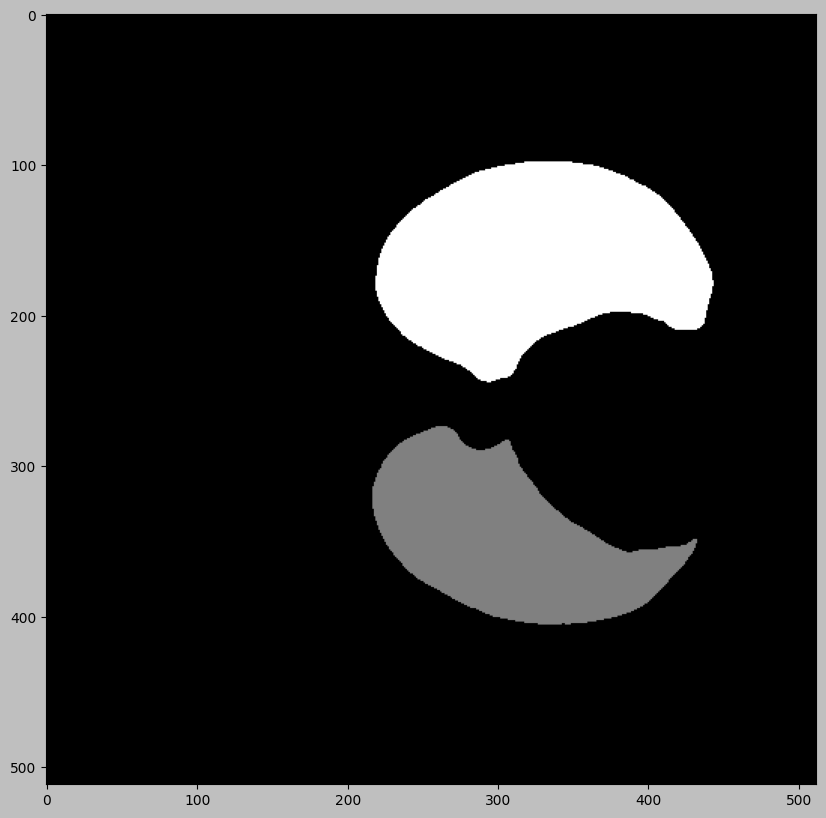

In [14]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(masks_slice)
plt.show()

It seems we are in the same case, so let's try directly change the orientation and rotation of the masks:

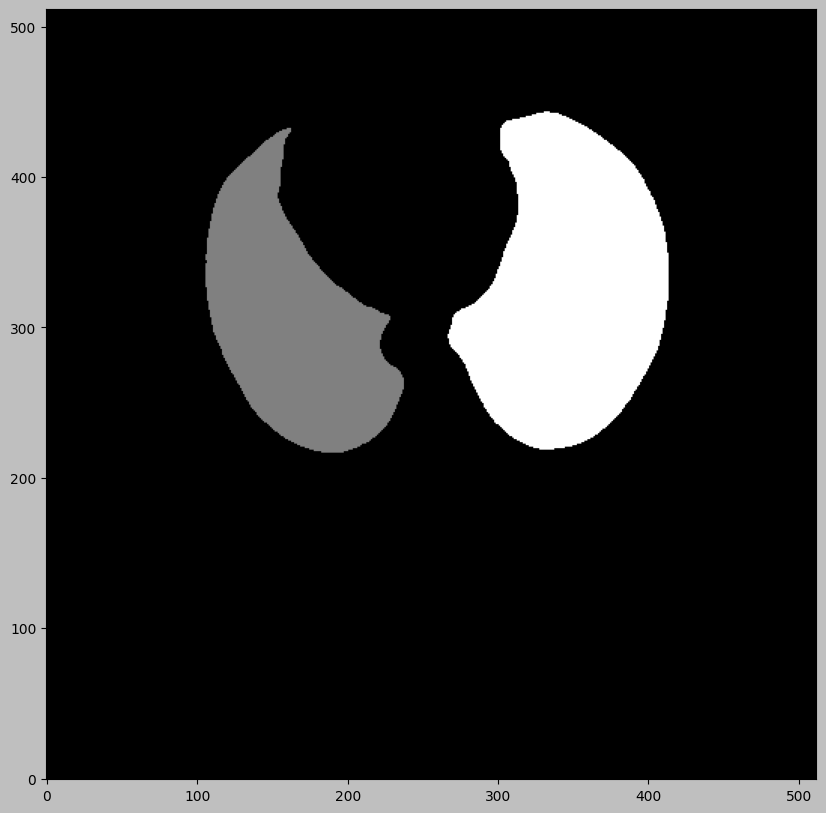

In [15]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(masks_slice, k=3), origin='lower')
plt.show()

To check that both image and masks slices are correctly aligned, let's display one on top of the other:

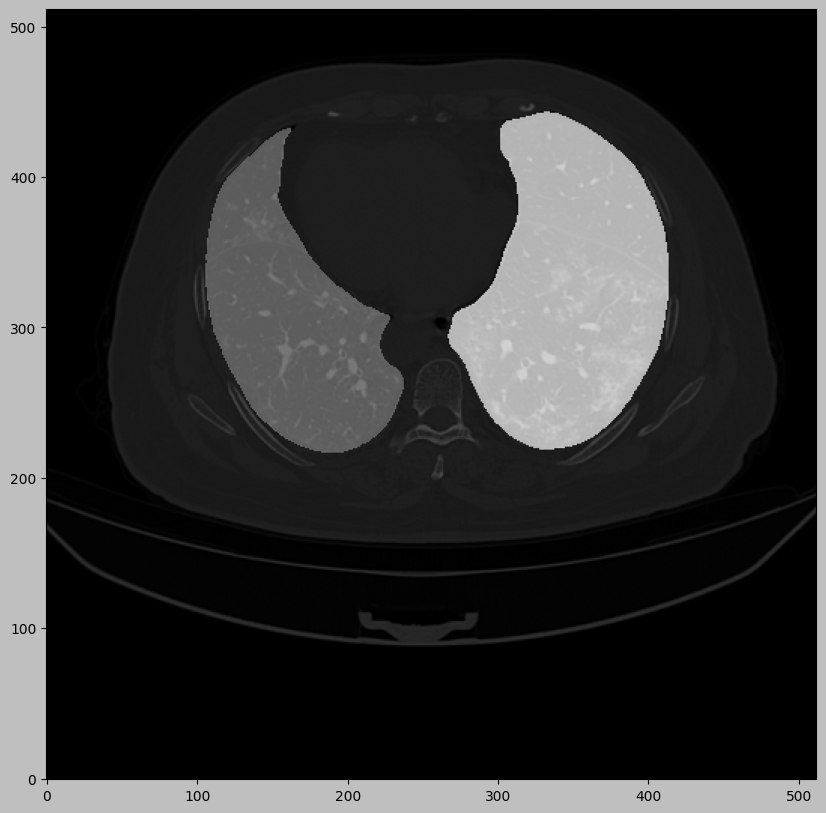

In [18]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(image_slice, k=3), origin='lower')
plt.imshow(np.rot90(masks_slice, k=3), origin='lower', alpha=0.7)
plt.show()

So, in summary, both slices must be treated the same way.
